# 안녕하세요:)

## AIVLE 미니프로젝트 '서울시 생활정보 기반 대중교통 수요 분석 ' 과정에 오신 여러분을 환영합니다.
* 본 과정에서는 서울시 생활정보 데이터를 기반으로 데이터 분석을 시도하고 주어진 문제를 해결할 것입니다.
* 우리는 공공 데이터를 활용해 버스노선 관련 인사이트를 도출하여 유용한 정책을 세우는데 도움을 주고자 합니다

## 개인과제
* 데이터 구조, 분포 확인, 전처리 : 1.1_버스정류장데이터 / 1.2 유동인구데이터 / 1.3_주민등록데이터 / 1.4_업종등록데이터
* 데이터간 관계 가설 수립 및 검증 : 1.5_데이터 분석

## ▣ 우리가 풀어야 하는 문제는 무엇인가요?

* 제공 데이터
    - 구 별 유동인구 데이터
    - 구 별 주민 등록 데이터
    - 구 별 업종 등록 정보
    - 버스 승하차 및 운행 노선 데이터 

### 위 제공 데이터를 분석하여 버스 노선 추가 필요 대상 지역(구 단위)을 선정합니다

# 이 4개의 데이터들을 어떻게 합칠까요?

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
standard = pd.DataFrame({'도착 시군구 코드': [11010, 11020, 11030, 11040, 11050, 11060, 11070, 11080, 11090, 11100, 11110, 11120, 11130, 11140, 11150, 11160, 11170, 11180, 11190, 11200, 11210, 11220, 11230, 11240, 11250],
                         '자치구' :['종로구','중구','용산구','성동구','광진구','동대문구','중랑구','성북구','강북구','도봉구','노원구','은평구','서대문구','마포구','양천구','강서구','구로구','금천구','영등포구','동작구','관악구','서초구','강남구','송파구','강동구']})

In [3]:
standard

,도착 시군구 코드,자치구
0,11010,종로구
1,11020,중구
2,11030,용산구
3,11040,성동구
4,11050,광진구
5,11060,동대문구
6,11070,중랑구
7,11080,성북구
8,11090,강북구
9,11100,도봉구


In [ ]:
# 버스 정류장 데이터 - df_seoul_bus_station
# 유동인구 데이터 - df_seoul_moving
# 구별 상권 데이터 - df_seoul_business
# 구별 등록 인구 데이터 - df_seoul_people

In [7]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
df_seoul_bus_station = pd.read_csv("df_seoul_bus_station.csv", sep = ",", encoding = "UTF-8")
df_seoul_bus_station.head()

,자치구,정류장수,노선수,승차총승객수,하차총승객수,승차평균승객수,하차평균승객수
0,강남구,499,91,1048,948,128.767927,121.371512
1,강동구,369,21,789,816,99.161194,97.118065
2,강북구,413,67,1187,1079,133.020373,128.791504
3,강서구,566,49,867,802,88.119480,87.587591
4,관악구,466,86,1507,1553,154.753674,157.516040


In [8]:
df_seoul_moving = pd.read_csv("df_seoul_moving.csv", sep = ",", encoding = "UTF-8")
df_seoul_moving.head()

,도착 시군구 코드,총 이동 시간,총 이동 인구,평균 이동 시간(분),이동인구(합),출도착 합계
0,11010,9356120,19385709.60,21.349599,44.235978,976468
1,11020,9306020,19715322.61,21.012462,44.516072,996671
2,11030,8514380,14707082.87,21.364786,36.903883,889965
3,11040,8887140,17449273.95,21.740324,42.685596,910724
4,11050,8625540,17947278.99,22.474283,46.762548,857223


In [19]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
df_seoul_business = pd.read_csv("df_seoul_business.csv", sep = ",", encoding = "UTF-8", thousands = ",")
df_seoul_business.head()

,자치구,한식 일반 음식점업.1,커피전문점.1,기타주점업.1,일반 교과 학원.1,한식 육류요리 전문점.1,총합
0,종로구,5912,3613,1413,382,1982,13302
1,중구,6414,3542,982,175,2121,13234
2,용산구,2987,2076,1332,573,1184,8152
3,성동구,2785,1859,621,1494,1545,8304
4,광진구,2861,1887,1577,1646,1678,9649


In [13]:
df_seoul_business.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   자치구            25 non-null     object
 1   한식 일반 음식점업.1   25 non-null     int64 
 2   커피전문점.1        25 non-null     int64 
 3   기타주점업.1        25 non-null     int64 
 4   일반 교과 학원.1     25 non-null     int64 
 5   한식 육류요리 전문점.1  25 non-null     int64 
dtypes: int64(5), object(1)
memory usage: 1.3+ KB


In [14]:
df_seoul_people = pd.read_csv("df_seoul_people.csv", sep = ",", encoding = "UTF-8")
df_seoul_people.head()

,자치구,남자,여자
0,종로구,74018,79666
1,중구,63869,67581
2,용산구,114571,121947
3,성동구,141662,149947
4,광진구,169525,183585


In [20]:
df = pd.merge(standard, df_seoul_bus_station)
df.head()

,도착 시군구 코드,자치구,정류장수,노선수,승차총승객수,하차총승객수,승차평균승객수,하차평균승객수
0,11010,종로구,349,106,924,815,131.889620,125.534028
1,11020,중구,178,103,922,872,121.020124,115.324511
2,11030,용산구,323,67,973,911,137.891694,134.485421
3,11040,성동구,435,58,729,668,96.377369,94.298888
4,11050,광진구,269,41,805,747,118.352546,118.523137


In [21]:
df = pd.merge(df, df_seoul_moving)
df.head()

,도착 시군구 코드,자치구,정류장수,노선수,승차총승객수,하차총승객수,승차평균승객수,하차평균승객수,총 이동 시간,총 이동 인구,평균 이동 시간(분),이동인구(합),출도착 합계
0,11010,종로구,349,106,924,815,131.889620,125.534028,9356120,19385709.60,21.349599,44.235978,976468
1,11020,중구,178,103,922,872,121.020124,115.324511,9306020,19715322.61,21.012462,44.516072,996671
2,11030,용산구,323,67,973,911,137.891694,134.485421,8514380,14707082.87,21.364786,36.903883,889965
3,11040,성동구,435,58,729,668,96.377369,94.298888,8887140,17449273.95,21.740324,42.685596,910724
4,11050,광진구,269,41,805,747,118.352546,118.523137,8625540,17947278.99,22.474283,46.762548,857223


In [22]:
df = pd.merge(df, df_seoul_business)
df.head()

,도착 시군구 코드,자치구,정류장수,노선수,승차총승객수,하차총승객수,승차평균승객수,하차평균승객수,총 이동 시간,총 이동 인구,평균 이동 시간(분),이동인구(합),출도착 합계,한식 일반 음식점업.1,커피전문점.1,기타주점업.1,일반 교과 학원.1,한식 육류요리 전문점.1,총합
0,11010,종로구,349,106,924,815,131.889620,125.534028,9356120,19385709.60,21.349599,44.235978,976468,5912,3613,1413,382,1982,13302
1,11020,중구,178,103,922,872,121.020124,115.324511,9306020,19715322.61,21.012462,44.516072,996671,6414,3542,982,175,2121,13234
2,11030,용산구,323,67,973,911,137.891694,134.485421,8514380,14707082.87,21.364786,36.903883,889965,2987,2076,1332,573,1184,8152
3,11040,성동구,435,58,729,668,96.377369,94.298888,8887140,17449273.95,21.740324,42.685596,910724,2785,1859,621,1494,1545,8304
4,11050,광진구,269,41,805,747,118.352546,118.523137,8625540,17947278.99,22.474283,46.762548,857223,2861,1887,1577,1646,1678,9649


In [24]:
pd.set_option("display.max_columns", None)

In [38]:
df = pd.merge(df, df_seoul_people)
df

,도착 시군구 코드,자치구,정류장수,노선수,승차총승객수,하차총승객수,승차평균승객수,하차평균승객수,총 이동 시간,총 이동 인구,평균 이동 시간(분),이동인구(합),출도착 합계,한식 일반 음식점업.1,커피전문점.1,기타주점업.1,일반 교과 학원.1,한식 육류요리 전문점.1,총합,남자,여자
0,11010,종로구,349,106,924,815,131.889620,125.534028,9356120,19385709.60,21.349599,44.235978,976468,5912,3613,1413,382,1982,13302,74018,79666
1,11020,중구,178,103,922,872,121.020124,115.324511,9306020,19715322.61,21.012462,44.516072,996671,6414,3542,982,175,2121,13234,63869,67581
2,11030,용산구,323,67,973,911,137.891694,134.485421,8514380,14707082.87,21.364786,36.903883,889965,2987,2076,1332,573,1184,8152,114571,121947
3,11040,성동구,435,58,729,668,96.377369,94.298888,8887140,17449273.95,21.740324,42.685596,910724,2785,1859,621,1494,1545,8304,141662,149947
4,11050,광진구,269,41,805,747,118.352546,118.523137,8625540,17947278.99,22.474283,46.762548,857223,2861,1887,1577,1646,1678,9649,169525,183585
5,11060,동대문구,306,73,983,890,131.841430,128.692017,8838130,16288077.28,21.673451,39.942708,909185,3566,1472,1082,984,1509,8613,172318,180274
6,11070,중랑구,380,48,778,708,87.403863,86.214261,7939300,13907465.59,23.412789,41.012753,751735,2479,1037,1000,1045,1504,7065,193623,199977
7,11080,성북구,602,99,1082,977,123.251922,123.149430,9072420,18757182.35,22.160283,45.816273,910409,2822,1384,1030,1755,1334,8325,212277,230403
8,11090,강북구,413,67,1187,1079,133.020373,128.791504,7649610,12570412.30,23.811274,39.128470,710127,2663,1095,1275,740,1176,6949,145934,154890
9,11100,도봉구,359,46,951,861,106.859356,103.855540,6995880,10821566.75,24.489976,37.882283,630389,2009,837,477,1162,943,5428,154440,163660


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25 entries, 0 to 24
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   도착 시군구 코드      25 non-null     int64  
 1   자치구            25 non-null     object 
 2   정류장수           25 non-null     int64  
 3   노선수            25 non-null     int64  
 4   승차총승객수         25 non-null     int64  
 5   하차총승객수         25 non-null     int64  
 6   승차평균승객수        25 non-null     float64
 7   하차평균승객수        25 non-null     float64
 8   총 이동 시간        25 non-null     int64  
 9   총 이동 인구        25 non-null     float64
 10  평균 이동 시간(분)    25 non-null     float64
 11  이동인구(합)        25 non-null     float64
 12  출도착 합계         25 non-null     int64  
 13  한식 일반 음식점업.1   25 non-null     int64  
 14  커피전문점.1        25 non-null     int64  
 15  기타주점업.1        25 non-null     int64  
 16  일반 교과 학원.1     25 non-null     int64  
 17  한식 육류요리 전문점.1  25 non-null     int64  
 18  총합          

In [27]:
df.corr()

,도착 시군구 코드,정류장수,노선수,승차총승객수,하차총승객수,승차평균승객수,하차평균승객수,총 이동 시간,총 이동 인구,평균 이동 시간(분),이동인구(합),출도착 합계,한식 일반 음식점업.1,커피전문점.1,기타주점업.1,일반 교과 학원.1,한식 육류요리 전문점.1,총합,남자,여자
도착 시군구 코드,1.000000,0.447511,-0.069435,0.332353,0.412018,0.017980,0.029956,0.235541,0.473119,0.533514,0.610548,-0.006645,0.308156,0.267956,0.318339,0.504141,0.342618,0.405965,0.697314,0.675779
정류장수,0.447511,1.000000,0.258798,0.410709,0.347409,-0.135318,-0.099146,0.356947,0.355635,0.223747,0.374723,0.197842,0.146445,0.209808,0.315121,0.293698,0.291643,0.261230,0.550032,0.580536
노선수,-0.069435,0.258798,1.000000,0.492314,0.410036,0.493541,0.470440,0.388332,0.226437,-0.678600,-0.003649,0.611131,0.413556,0.425180,0.262016,-0.058862,0.264624,0.284829,-0.294351,-0.268906
승차총승객수,0.332353,0.410709,0.492314,1.000000,0.956743,0.691755,0.711462,0.110899,0.078306,-0.058867,0.022438,0.122044,0.127361,0.115567,0.243327,-0.048164,0.073477,0.086710,0.143984,0.119680
하차총승객수,0.412018,0.347409,0.410036,0.956743,1.000000,0.664443,0.709987,0.126395,0.112760,0.034431,0.100327,0.098167,0.106382,0.091158,0.271958,-0.047914,0.066210,0.075015,0.248829,0.215694
승차평균승객수,0.017980,-0.135318,0.493541,0.691755,0.664443,1.000000,0.989288,0.140483,0.067920,-0.382202,-0.079733,0.289803,0.257629,0.204745,0.220043,-0.145105,0.073557,0.120458,-0.255715,-0.282278
하차평균승객수,0.029956,-0.099146,0.470440,0.711462,0.709987,0.989288,1.000000,0.148381,0.062384,-0.356171,-0.072466,0.282963,0.212645,0.160374,0.227213,-0.174517,0.043023,0.081174,-0.192074,-0.221558
총 이동 시간,0.235541,0.356947,0.388332,0.110899,0.126395,0.140483,0.148381,1.000000,0.923298,-0.141914,0.808313,0.913888,0.816341,0.835772,0.655550,0.513115,0.832354,0.816929,0.350985,0.393565
총 이동 인구,0.473119,0.355635,0.226437,0.078306,0.112760,0.067920,0.062384,0.923298,1.000000,0.095727,0.951399,0.760608,0.872074,0.873656,0.678119,0.741546,0.917131,0.931960,0.509632,0.544162
평균 이동 시간(분),0.533514,0.223747,-0.678600,-0.058867,0.034431,-0.382202,-0.356171,-0.141914,0.095727,1.000000,0.373091,-0.527325,-0.128780,-0.181316,-0.034993,0.253965,0.024519,-0.006339,0.644669,0.631852


In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

# 시각화 한글폰트 설정
# 맑은 고딕

plt.rc('font', family='Malgun Gothic')
sns.set(font="Malgun Gothic",#"NanumGothicCoding", 
        rc={"axes.unicode_minus":False}, # 마이너스 부호 깨짐 현상 해결
        style='darkgrid')

# scipy
import scipy.stats as spst

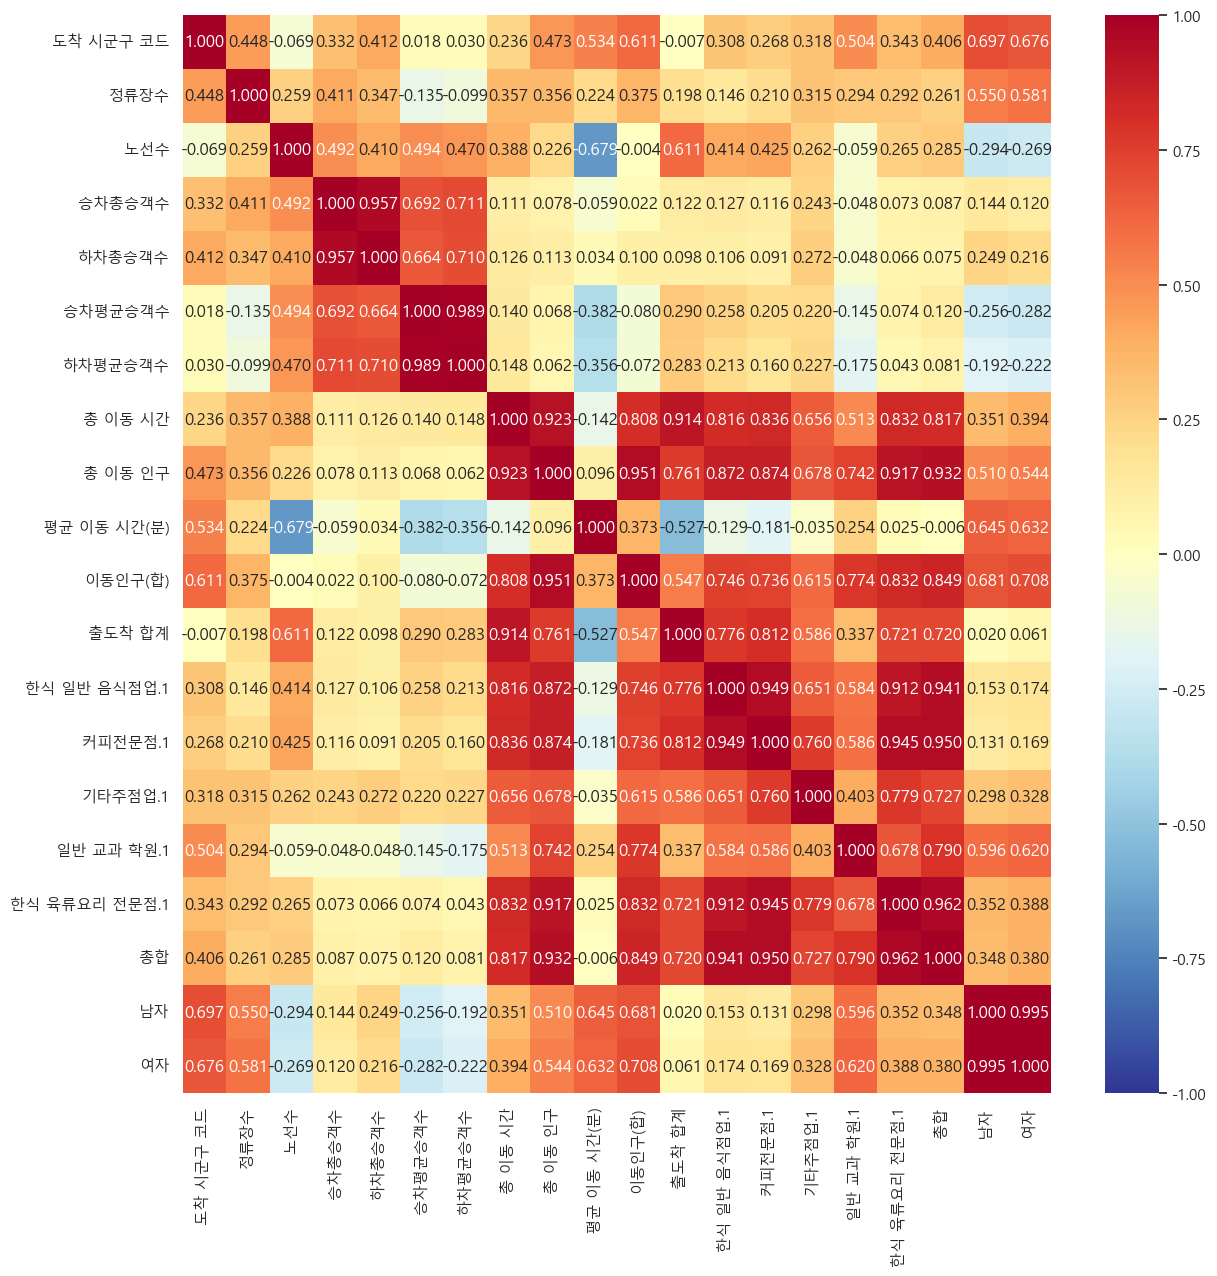

In [37]:
plt.figure(figsize = (14, 14))
sns.heatmap(df.corr(), 
            annot = True,            # 숫자(상관계수) 표기 여부
            fmt = '.3f',             # 숫자 포멧 : 소수점 3자리까지 표기
            cmap = 'RdYlBu_r',       # 칼라맵
            vmin = -1, vmax = 1)     # 값의 최소, 최대값값
plt.show()

---

## 1.가설 수립
+ 어떤 데이터를 label 데이터로 하실 건가요?

? 정해진게 없나요? - 네 라벨을 개인및 조별로 고민하셔서 라벨데이터를 설정하시면 되겠습니다
? 가설마다 라벨데이터가 달라도 상관없나요? 네 그렇습니다
? 가설은 3개만 해야하나요? 그 이상 하셔도 무방합니다

### 가설을 설정해 봅시다 (인당 최소 3개) - 미니프로젝트 진행의 편의상 가설은 이변량 분석을 염두에 두고 설정해 주세요

* 가설 1 : 노선수와 출도착 합계
    - 노선수와 출도착 합계(출발, 도착 자치구 코드 합계)는 연관이 있다
    - 노선수와 출도착 합계(출발, 도착 자치구 코드 합계)는 연관이 없다

* 가설 2 : 정류장수와 출도착 합계
    - 정류장수와 출도착 합계(출발, 도착 자치구 코드 합계)는 연관이 있다
    - 정류장수와 출도착 합계(출발, 도착 자치구 코드 합계)는 연관이 없다

* 가설 3 : 출도착 합계와 구별 업종 총합
    - 출도착 합계와 구별 업종 총합은 연관이 있다
    - 출도착 합계와 구별 업종 총합은 연관이 없다

## 2.단변량 분석

+ 변수의 비즈니스 의미  

+ 숫자? 범주?  

+ 전처리 사항
   - NaN 존재 여부 및 조치 방안  
   - 가변수화 대상여부  
   
+ 기초통계량

+ 분포  

+ 위 정보로부터 파악한 내용(비즈니스!) 정리  

+ 추가 분석해볼 사항 도출

In [55]:
# 시각화 한글폰트 설정
import seaborn as sns
import matplotlib.pyplot as plt

plt.rc('font', family='nanum')
sns.set(font = "NanumGothicCoding", 
        rc={"axes.unicode_minus":False}, # 마이너스 부호 깨짐 현상 해결
        style='darkgrid')     

### 1)


### 2)

### 3)

## 3.이변량 분석

* 자료의 종류에 맞게 X --> Y 에 대해서 그래프(시각화)와 가설검정(수치화)를 수행하고 결과를 평가합니다.

* 가설검정시 다음의 항목을 참조하여 수행합니다.
    * 유의수준 : 5%
    * 숫자 --> 숫자 : 상관분석
    * 범주 --> 범주 : 카이제곱검정
    * 범주 --> 숫자 : t검정, 분산분석
    * 숫자 --> 범주 : 로지스틱 회귀모형을 통해, 회귀계수의 P.value로 검정을 수행합니다.


In [ ]:
target = 

### 1)

### 2)

### 3)

### 상관계수를 구하고 HeatMap으로 시각화 후 나름의 분석을 해보세요.



In [57]:
#가설1 : 노선수와 출도착 합계는 관계 있다
import scipy.stats as spst
result = spst.pearsonr(df["노선수"], df["출도착 합계"])
print(f'상관계수 : {result[0]}, p-value : {result[1]}')

상관계수 : 0.6111309571554604, p-value : 0.0011731662457401208


- 상관계수가 0.5이상이고 p-value값은 0.05보다 작으므로 노선수와 구별 출발, 도착 코드 합은 관계가 있다..?

In [63]:
temp = df.iloc[:,[0, 3, 12]]

In [64]:
temp

,도착 시군구 코드,노선수,출도착 합계
0,11010,106,976468
1,11020,103,996671
2,11030,67,889965
3,11040,58,910724
4,11050,41,857223
5,11060,73,909185
6,11070,48,751735
7,11080,99,910409
8,11090,67,710127
9,11100,46,630389


C:\Users\User\anaconda3\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  fig.canvas.draw()
C:\Users\User\anaconda3\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 52265 (\N{HANGUL SYLLABLE CAG}) missing from current font.
  fig.canvas.draw()
C:\Users\User\anaconda3\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from current font.
  fig.canvas.draw()
C:\Users\User\anaconda3\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 44400 (\N{HANGUL SYLLABLE GUN}) missing from current font.
  fig.canvas.draw()
C:\Users\User\anaconda3\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 44396 (\N{HANGUL SYLLABLE GU}) missing from current font.
  fig.canvas.draw()
C:\Users\User\anaconda3\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 53076 (\N{HANGUL SYLLABLE KO}) missing from current font.
  fig.canvas.draw()
C:\Users\User\anaconda3\lib\site-packa

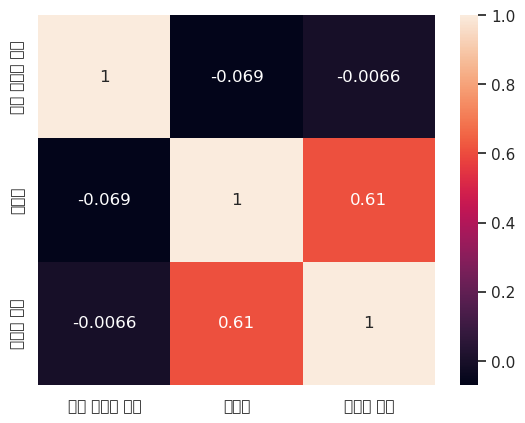

In [65]:
# 아래에 실습코드를 작성하고 상관계수를 확인 및 시각화 합니다.
sns.heatmap(temp.corr(), annot = True)
plt.show()

- 히트맵에서도 노선수와 출도착 합계가 관계있어 보인다.

<hr>

In [78]:
#가설2 : 정류장수와 출도착 합계
import scipy.stats as spst
result = spst.pearsonr(df["정류장수"], df["출도착 합계"])
print(result)
# print(f'상관계수 : {result[0]}, p-value : {result[1]}')

PearsonRResult(statistic=0.19784185249848962, pvalue=0.3431390295046597)


- 상관계수가 약 0.2에 p-value는 0.05보다 커서 정류장수와 구별 출발, 도착 코드의 합은 관계가 없다.
- 1.1 버스정류장데이터 봤을 때는 정류장수도 이용승객에 영향을 미치는 줄 알았는데 아닌듯?

In [67]:
temp = df.iloc[:,[0, 2, 12]]

In [68]:
temp

,도착 시군구 코드,정류장수,출도착 합계
0,11010,349,976468
1,11020,178,996671
2,11030,323,889965
3,11040,435,910724
4,11050,269,857223
5,11060,306,909185
6,11070,380,751735
7,11080,602,910409
8,11090,413,710127
9,11100,359,630389


C:\Users\User\anaconda3\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  fig.canvas.draw()
C:\Users\User\anaconda3\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 52265 (\N{HANGUL SYLLABLE CAG}) missing from current font.
  fig.canvas.draw()
C:\Users\User\anaconda3\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from current font.
  fig.canvas.draw()
C:\Users\User\anaconda3\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 44400 (\N{HANGUL SYLLABLE GUN}) missing from current font.
  fig.canvas.draw()
C:\Users\User\anaconda3\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 44396 (\N{HANGUL SYLLABLE GU}) missing from current font.
  fig.canvas.draw()
C:\Users\User\anaconda3\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 53076 (\N{HANGUL SYLLABLE KO}) missing from current font.
  fig.canvas.draw()
C:\Users\User\anaconda3\lib\site-packa

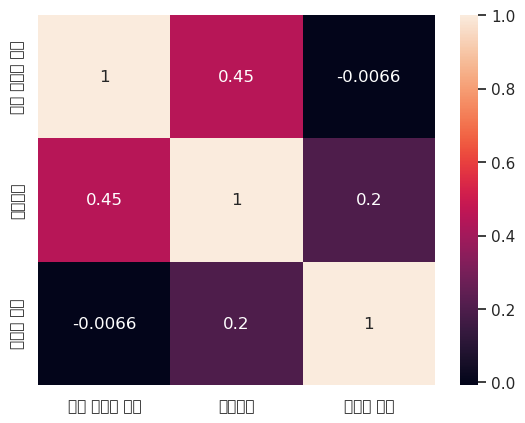

In [69]:
# 아래에 실습코드를 작성하고 상관계수를 확인 및 시각화 합니다.
sns.heatmap(temp.corr(), annot = True)
plt.show()

- 정류장수와 출도착 합계 상관계수는 0.2라 상관관계가 약하다?

In [71]:
#가설3 : 출도착 합계와 총합(구별 업종 총합)
import scipy.stats as spst
result = spst.pearsonr(df["출도착 합계"], df["총합"])
print(f'상관계수 : {result[0]}, p-value : {result[1]}')

상관계수 : 0.7198866172039173, p-value : 4.974187360091601e-05


- 상관계수가 0.5가 넘고 p-value값은 0.05보다 작아서 구별 출발, 도착 코드의 합과 업종 총합과는 관계가 있다?

In [75]:
temp = df.iloc[:,[0, 12, 18]]

In [76]:
temp

,도착 시군구 코드,출도착 합계,총합
0,11010,976468,13302
1,11020,996671,13234
2,11030,889965,8152
3,11040,910724,8304
4,11050,857223,9649
5,11060,909185,8613
6,11070,751735,7065
7,11080,910409,8325
8,11090,710127,6949
9,11100,630389,5428


C:\Users\User\anaconda3\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  fig.canvas.draw()
C:\Users\User\anaconda3\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 52265 (\N{HANGUL SYLLABLE CAG}) missing from current font.
  fig.canvas.draw()
C:\Users\User\anaconda3\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from current font.
  fig.canvas.draw()
C:\Users\User\anaconda3\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 44400 (\N{HANGUL SYLLABLE GUN}) missing from current font.
  fig.canvas.draw()
C:\Users\User\anaconda3\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 44396 (\N{HANGUL SYLLABLE GU}) missing from current font.
  fig.canvas.draw()
C:\Users\User\anaconda3\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 53076 (\N{HANGUL SYLLABLE KO}) missing from current font.
  fig.canvas.draw()
C:\Users\User\anaconda3\lib\site-packa

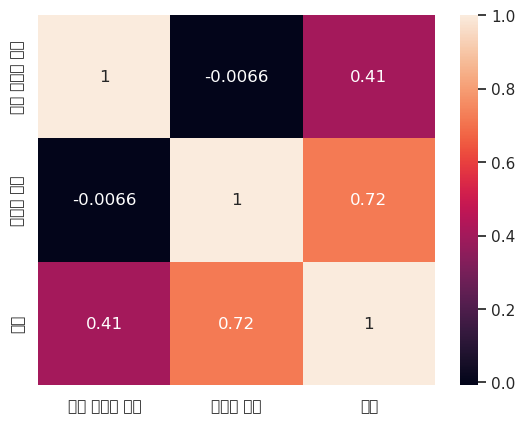

In [77]:
# 아래에 실습코드를 작성하고 상관계수를 확인 및 시각화 합니다.
sns.heatmap(temp.corr(), annot = True)
plt.show()

- 구별 출발, 도착 코드의 합과 업종 총합의 상관계수는 0.72로 강한 상관관계를 가진다?

## 4.관계 정리

### 1) 강한 관계의 변수

- 노선수와 출도착 합계(구별 출발, 도착 코드 합)
- 출도착 합계(구별 출발, 도착 코드의 합)과 업종 총합

### 2) 약한 관계의 변수

- 정류장수와 출도착 합계(구별 출발, 도착 코드 합)

## 5.솔루션 도출 - business insight

### 어느 구에 버스 노선 또는 정류장이 제일 필요한가요? 그 이유는?

출발, 도착 시군구 코드 유동인구 데이터를 토대로 노선수, 업종, 정류장수와 관계를 찾아봤는데
노선수와 해당 구 업종 수와 높은 상관 관계를 가지고 있었다

그러므로 유동인구 수에 비해 노선수가 적은 광진구에 버스 노선 추가하면 좋을 것 같다는 예상을
해본다

이게 맞나?